#Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('/content/gapminder_full - gapminder_full.csv')
df

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623


#EDA

In [11]:
mean = df.mean(['country']=='India')
median = df.median(['country']=='India')
skewness = df.skew(['country']=='India')

print("Mean:", mean)
print("Median:", median)
print("Skewness:", skewness)


Mean: year          1.979500e+03
population    2.960121e+07
life_exp      5.947444e+01
gdp_cap       7.215327e+03
dtype: float64
Median: year          1.979500e+03
population    7.023596e+06
life_exp      6.071250e+01
gdp_cap       3.531847e+03
dtype: float64
Skewness: year          0.000000
population    8.340218
life_exp     -0.252702
gdp_cap       3.850272
dtype: float64


<ipython-input-11-2a3fcd2380e7>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean(['country']=='India')
<ipython-input-11-2a3fcd2380e7>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = df.median(['country']=='India')
<ipython-input-11-2a3fcd2380e7>:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silen

In [12]:
df.describe()

,year,population,life_exp,gdp_cap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [14]:
df.isnull().sum()

country       0
year          0
population    0
continent     0
life_exp      0
gdp_cap       0
dtype: int64

In [15]:
df['population'].min()

60011

In [16]:
df['population'].max()

1318683096

In [17]:
df['population'].median()

7023595.5

In [18]:
df['population'].mean()

29601212.324530516

In [19]:
df['country'].value_counts()
#Number of entries in each country

Afghanistan          12
Pakistan             12
New Zealand          12
Nicaragua            12
Niger                12
                     ..
Eritrea              12
Equatorial Guinea    12
El Salvador          12
Egypt                12
Zimbabwe             12
Name: country, Length: 142, dtype: int64

In [20]:
df['country'].value_counts().count()
#Total number of countries in dataset

142

In [21]:
df['continent'].value_counts()
#Number of entries in column='continent'

Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: continent, dtype: int64

In [22]:
df['continent'].value_counts().count()
#Number of continents in dataset

5

In [23]:
df['year'].value_counts()
#Number of  entries in "specified year"

1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
Name: year, dtype: int64

In [24]:
(df['year'].value_counts()).count()
#Total Number of years when census was done

12

#Visualization

In [25]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import statsmodels

In [26]:
continent1 = 'Asia'
data_continent_1 = df[df['continent'] == continent1]

# Group the data by year and calculate the total population for each year
population_over_years_1 = data_continent_1.groupby('year')['population'].sum()
print(continent1)
population_over_years_1

Asia


year
1952    1395357351
1957    1562780599
1962    1696357182
1967    1905662900
1972    2150972248
1977    2384513556
1982    2610135582
1987    2871220762
1992    3133292191
1997    3383285500
2002    3601802203
2007    3811953827
Name: population, dtype: int64

In [27]:
continent2 = 'Africa'
data_continent_Africa = df[df['continent'] == continent2]

# Group the data by year and calculate the total population for each year
population_over_years_Africa = data_continent_Africa.groupby('year')['population'].sum()
print(continent2)
population_over_years_Africa

Africa


year
1952    237640501
1957    264837738
1962    296516865
1967    335289489
1972    379879541
1977    433061021
1982    499348587
1987    574834110
1992    659081517
1997    743832984
2002    833723916
2007    929539692
Name: population, dtype: int64

In [28]:
continent3 = 'Americas'
data_continent_Americas = df[df['continent'] == continent3]

# Group the data by year and calculate the total population for each year
population_over_years_Americas = data_continent_Americas.groupby('year')['population'].sum()
print(continent3)
population_over_years_Americas

Americas


year
1952    345152446
1957    386953916
1962    433270254
1967    480746623
1972    529384210
1977    578067699
1982    630290920
1987    682753971
1992    739274104
1997    796900410
2002    849772762
2007    898871184
Name: population, dtype: int64

In [29]:
continent4 = 'Europe'
data_continent_Europe = df[df['continent'] == continent4]

# Group the data by year and calculate the total population for each year
population_over_years_Europe = data_continent_Europe.groupby('year')['population'].sum()
print(continent4)
population_over_years_Europe

Europe


year
1952    418120846
1957    437890351
1962    460355155
1967    481178958
1972    500635059
1977    517164531
1982    531266901
1987    543094160
1992    558142797
1997    568944148
2002    578223869
2007    586098529
Name: population, dtype: int64

In [30]:
continent5 = 'Oceania'
data_continent_Oceania = df[df['continent'] == continent5]

# Group the data by year and calculate the total population for each year
population_over_years_Oceania = data_continent_Oceania.groupby('year')['population'].sum()
print(continent5)
population_over_years_Oceania

Oceania


year
1952    10686006
1957    11941976
1962    13283518
1967    14600414
1972    16106100
1977    17239000
1982    18394850
1987    19574415
1992    20919651
1997    22241430
2002    23454829
2007    24549947
Name: population, dtype: int64

In [31]:
# Group the data by continent and calculate the total population for each continent
continent_population = df.groupby('continent')['population'].sum()
#print(continent_population)
print(continent_population.sort_values(ascending=True)) #sorting of basis of population.

continent
Oceania       212992136
Europe       6181115304
Africa       6187585961
Americas     7351438499
Asia        30507333901
Name: population, dtype: int64


In [32]:
# Finding the continent with the highest population
most_populous_continent = continent_population.idxmax()
print(continent_population[most_populous_continent])
print(most_populous_continent)

30507333901
Asia


In [33]:
#Second most populated and least populated continents #Ascending/Descending + INDEX
second_highest_continent = continent_population.sort_values(ascending=False).index[1]
second_highest_population = continent_population.sort_values(ascending=False)[1]
print(second_highest_population)
print(second_highest_continent)

7351438499
Americas


In [34]:
least_populated_continent = continent_population.sort_values().index[0]
least_population = continent_population.sort_values()[0]
print(least_population)
print(least_populated_continent)

212992136
Oceania


In [35]:
continent1 = 'Asia'

# Filter the data for the specified continent
continent1_data = df[df['continent'] == continent1]

# Get the unique countries in the continent
countries_in_asia = continent1_data['country'].unique() #unique removes duplicates values

# Print the countries
print(countries_in_asia)

['Afghanistan' 'Bahrain' 'Bangladesh' 'Cambodia' 'China'
 'Hong Kong, China' 'India' 'Indonesia' 'Iran' 'Iraq' 'Israel' 'Japan'
 'Jordan' 'Korea, Dem. Rep.' 'Korea, Rep.' 'Kuwait' 'Lebanon' 'Malaysia'
 'Mongolia' 'Myanmar' 'Nepal' 'Oman' 'Pakistan' 'Philippines'
 'Saudi Arabia' 'Singapore' 'Sri Lanka' 'Syria' 'Taiwan' 'Thailand'
 'Vietnam' 'West Bank and Gaza' 'Yemen, Rep.']


In [36]:
continent3 = 'Americas'

# Filter the data for the specified continent
continent3_data = df[df['continent'] == continent3]

# Get the unique countries in the continent
countries_in_americas = continent3_data['country'].unique() #unique removes duplicates values

# Print the countries
print(countries_in_americas)

['Argentina' 'Bolivia' 'Brazil' 'Canada' 'Chile' 'Colombia' 'Costa Rica'
 'Cuba' 'Dominican Republic' 'Ecuador' 'El Salvador' 'Guatemala' 'Haiti'
 'Honduras' 'Jamaica' 'Mexico' 'Nicaragua' 'Panama' 'Paraguay' 'Peru'
 'Puerto Rico' 'Trinidad and Tobago' 'United States' 'Uruguay' 'Venezuela']


In [37]:
len(countries_in_asia)

33

In [38]:
len(countries_in_americas)

25

##Statistical Measures

###Continent and Life Expectancy

In [39]:
from scipy.stats import ttest_ind

In [40]:
#for t-test #1
asia_data = df[df['continent'] == 'Asia']['life_exp']
europe_data = df[df['continent'] == 'Europe']['life_exp']

#for t-test #2
africa_data = df[df['continent'] == 'Africa']['life_exp']
americas_data = df[df['continent'] == 'Americas']['life_exp']

oceania_data = df[df['continent'] == 'Oceania']['life_exp']

In [41]:
t_statistic_1, p_value_1 = ttest_ind(asia_data, europe_data)
print(t_statistic_1)
print(p_value_1)

-17.35002500917482
5.410130343019877e-57


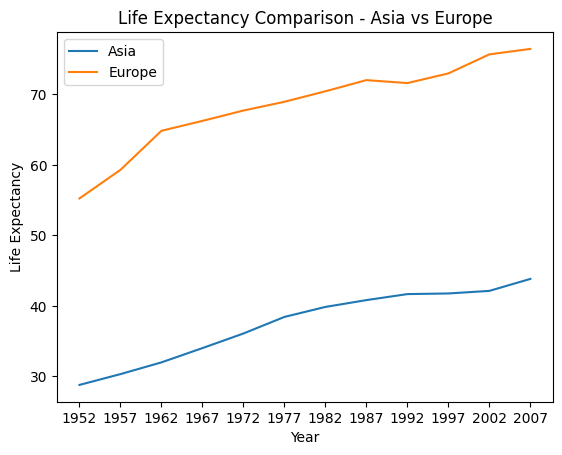

In [42]:
xticks = list(range(1952, 2008, 5))

asia_data_trimmed = asia_data[:len(xticks)]
europe_data_trimmed = europe_data[:len(xticks)]

plt.plot(xticks, asia_data_trimmed, label='Asia')
plt.plot(xticks, europe_data_trimmed, label='Europe')

plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Comparison - Asia vs Europe')

plt.legend()

plt.xticks(xticks)

plt.show()

t-test#1 implies that mean life expectancy in Asia is lower than the mean life expectancy in Europe

p_value_1 is very small (close to zero) and way smaller than 0.05.

Hence we can **reject the null hypothesis**.

In [43]:
t_statistic_2, p_value_2 = ttest_ind(americas_data, africa_data)
print(t_statistic_2)
print(p_value_2)


# positive value of "*t-statistic*" indicates that the mean of "americas_data" is higher than the mean of "africa_data".

24.397827428849748
7.852255922453817e-102


 The positive value of the t-statistic indicates that the mean of the "Americas" group is higher than the mean of the "Africa" group.

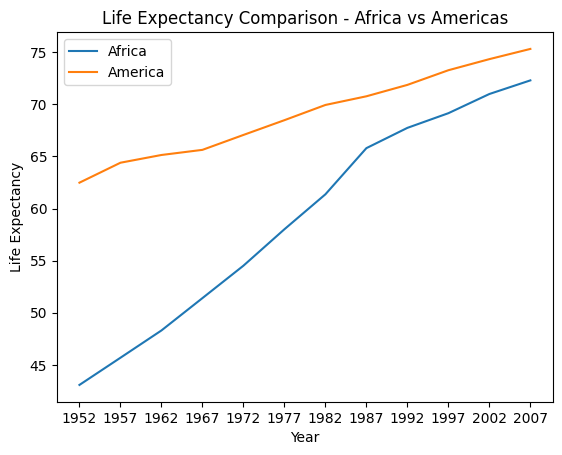

In [44]:
xticks = list(range(1952, 2008, 5))

africa_data_trimmed = africa_data[:len(xticks)]
americas_data_trimmed = americas_data[:len(xticks)]

plt.plot(xticks, africa_data_trimmed, label='Africa')
plt.plot(xticks, americas_data_trimmed, label='America')

plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Comparison - Africa vs Americas')

plt.legend()

plt.xticks(xticks)

plt.show()

t-test#1 implies that mean life expectancy in America is greater than the mean life expectancy in Africa

p_value_1 is very small (close to zero) and way smaller than 0.05.

Hence we can reject the null hypothesis.

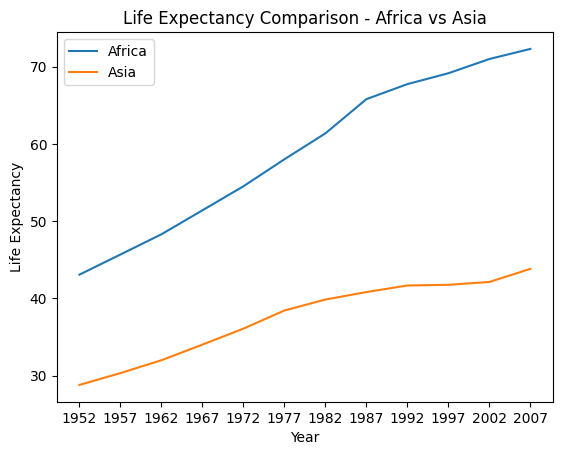

In [45]:
xticks_values = list(range(1952, 2008, 5))

africa_data_trimmed = africa_data[:len(xticks)]
asia_data_trimmed = asia_data[:len(xticks)]

plt.plot(xticks, africa_data_trimmed, label='Africa')
plt.plot(xticks, asia_data_trimmed, label='Asia')

plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Comparison - Africa vs Asia')

plt.legend()

plt.xticks(xticks_values)

plt.show()

###Country and GDP

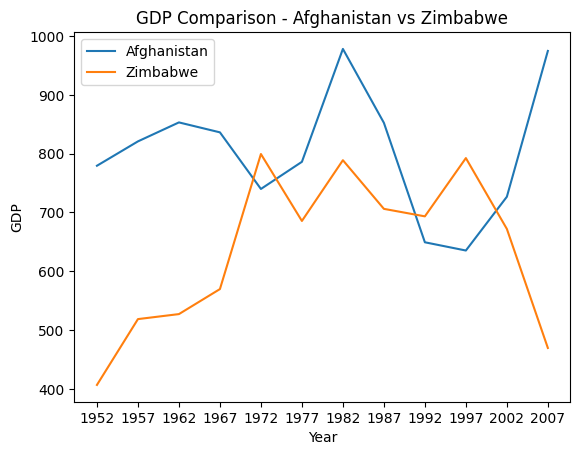

In [46]:
country1_data = df[df['country'] == 'Afghanistan']['gdp_cap'] #Change Country1 Name here
country2_data = df[df['country'] == 'Zimbabwe']['gdp_cap']    #Change Country2 Name here

xticks_values = list(range(1952, 2008, 5))

country1_data_trimmed = country1_data[:len(xticks_values)]
country2_data_trimmed = country2_data[:len(xticks_values)]

plt.plot(xticks_values, country1_data_trimmed, label='Afghanistan')   #Change Country1 Name here
plt.plot(xticks_values, country2_data_trimmed, label='Zimbabwe')      #Change Country2 Name here

plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Comparison - Afghanistan vs Zimbabwe')   #Change Countries Name here

plt.legend()

plt.xticks(xticks_values)

plt.show()


In [47]:
t_stat_gdp,p_value_gdp = scipy.stats.ttest_ind(country1_data,country2_data)
print(t_stat_gdp)
print(p_value_gdp)

3.3598949651373125
0.0028292645862515705


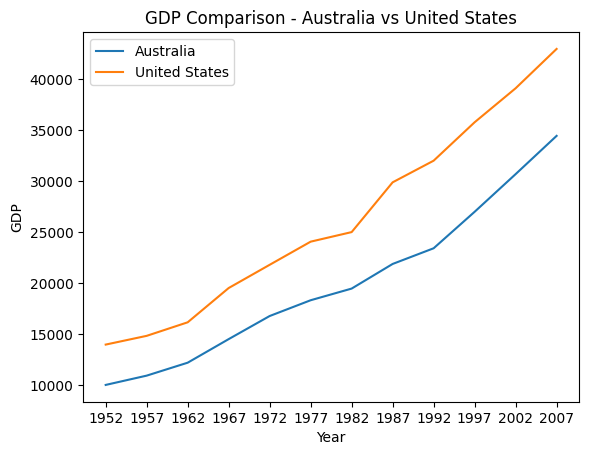

In [48]:
country1_data = df[df['country'] == 'Australia']['gdp_cap'] #Change Country1 Name here
country2_data = df[df['country'] == 'United States']['gdp_cap']    #Change Country2 Name here

xticks_values = list(range(1952, 2008, 5))

country1_data_trimmed = country1_data[:len(xticks_values)]
country2_data_trimmed = country2_data[:len(xticks_values)]

plt.plot(xticks_values, country1_data_trimmed, label='Australia')   #Change Country1 Name here
plt.plot(xticks_values, country2_data_trimmed, label='United States')      #Change Country2 Name here

plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Comparison - Australia vs United States')   #Change Countries Name here

plt.legend()

plt.xticks(xticks_values)

plt.show()